# ***TAREA 1 INTELIGENCIA ARTIFICIAL***
**Parte 1**

En la primera parte de la tarea, se usa una base de datos que junta datos de más de 200,000 individuos, abarcando varias variables con el propósito de establecer correlaciones entre dichos factores y la presencia o ausencia de diabetes, ya sea de tipo 1 o tipo 2.

* Configuración e instalación de librerías





In [ ]:
!pip install bnlearn==0.7 -q  # Instalo la versión 0.7 de bnlearn
!pip install numpy==1.23.5 -q  # Insto la versión 1.23.5 de numpy

# Importo la librería random para su uso posterior
import random


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00


* Montar Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Crear directorio para configuración de Kaggle


In [3]:
! mkdir ~/.kaggle

* Copiar archivo de credenciales de Kaggle a la ubicación correcta
**HAY QUE VERIFICAR LA RUTA, YA QUE DEPENDE DE EL NOMBRE DE LAS CARPETAS EN EL DRIVE**

In [6]:
! cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

* Cambiar los permisos del archivo de credenciales de Kaggle


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

* Descargar dataset de Kaggle usando Kaggle API


In [ ]:
! kaggle datasets download alexteboul/diabetes-health-indicators-dataset -f diabetes_012_health_indicators_BRFSS2015.csv #https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

  0% 0.00/2.65M [00:00<?, ?B/s]
100% 2.65M/2.65M [00:00<00:00, 126MB/s]


* Descomprimir el archivo ZIP del conjunto de datos


In [ ]:
! unzip diabetes_012_health_indicators_BRFSS2015.csv.zip

Archive:  diabetes_012_health_indicators_BRFSS2015.csv.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  


* Importar la biblioteca pandas

In [ ]:
import pandas as pd

* Lectura de datos desde el archivo .csv

In [ ]:
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(dataset)

In [ ]:
ds = dataset[["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","AnyHealthcare","NoDocbcCost","DiffWalk","Sex","Diabetes_012"]]
print(ds.head(10))

* Se inicia el proceso de aprendizaje de la estructura de la red bayesiana utilizando los datos del archivo CSV.

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


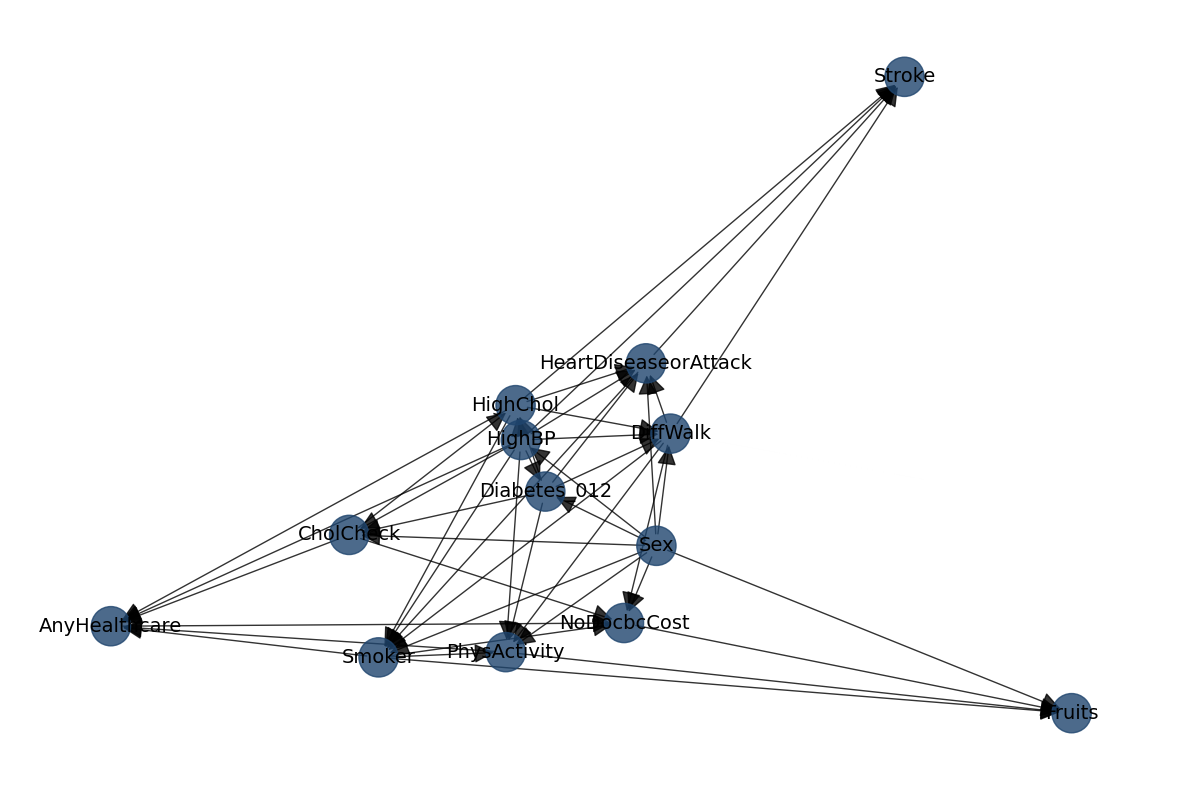

In [ ]:
import bnlearn as bn
model = bn.structure_learning.fit(ds)
plot = bn.plot(model)

* Se caracterizan los parámetros.

In [ ]:
model = bn.parameter_learning.fit(model,ds,methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of HighBP:
+-------------+--------------------+---------------------+
| Sex         | Sex(0.0)           | Sex(1.0)            |
+-------------+--------------------+---------------------+
| HighBP(0.0) | 0.5935890057133232 | 0.5416822629805893  |
+-------------+--------------------+---------------------+
| HighBP(1.0) | 0.4064109942866769 | 0.45831773701941075 |
+-------------+--------------------+---------------------+
[bnlearn] >CPD of HighChol:
+---------------+-----+--------------------+
| CholCheck     | ... | CholCheck(1.0)     |
+---------------+-----+--------------------+
| Diabetes_012  | ... | Diabetes_012(2.0)  |
+---------------+-----+--------------------+
| HighBP        | ... | HighBP(1.0)        |
+---------------+-----+--------------------+
| HighChol(0.0) | ... | 0.2782012482262379 |
+---------------+-----+--------------------+
| HighChol

* Construcción de una nueva base de datos utilizando la mitad aleatoria de los datos seleccionando de manera uniforme. Donde cada dato tiene un 50% de probabilidades de estar en la nueva base de datos.

In [ ]:
nueva_base_de_datos = pd.DataFrame(columns=ds.columns)
# Probabilidad del 50% de incluir cada fila en la nueva base de datos
for index, row in ds.iterrows():
    if random.random() < 0.5:
        nueva_base_de_datos = nueva_base_de_datos.append(row, ignore_index=True)

# Ver las primeras 10 filas de la nueva base de datos
print(nueva_base_de_datos.head(10))

* Se inicia el proceso de aprendizaje de la estructura de la segunda red bayesiana utilizando los datos aleatoriamente escogidos anteriormente.

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


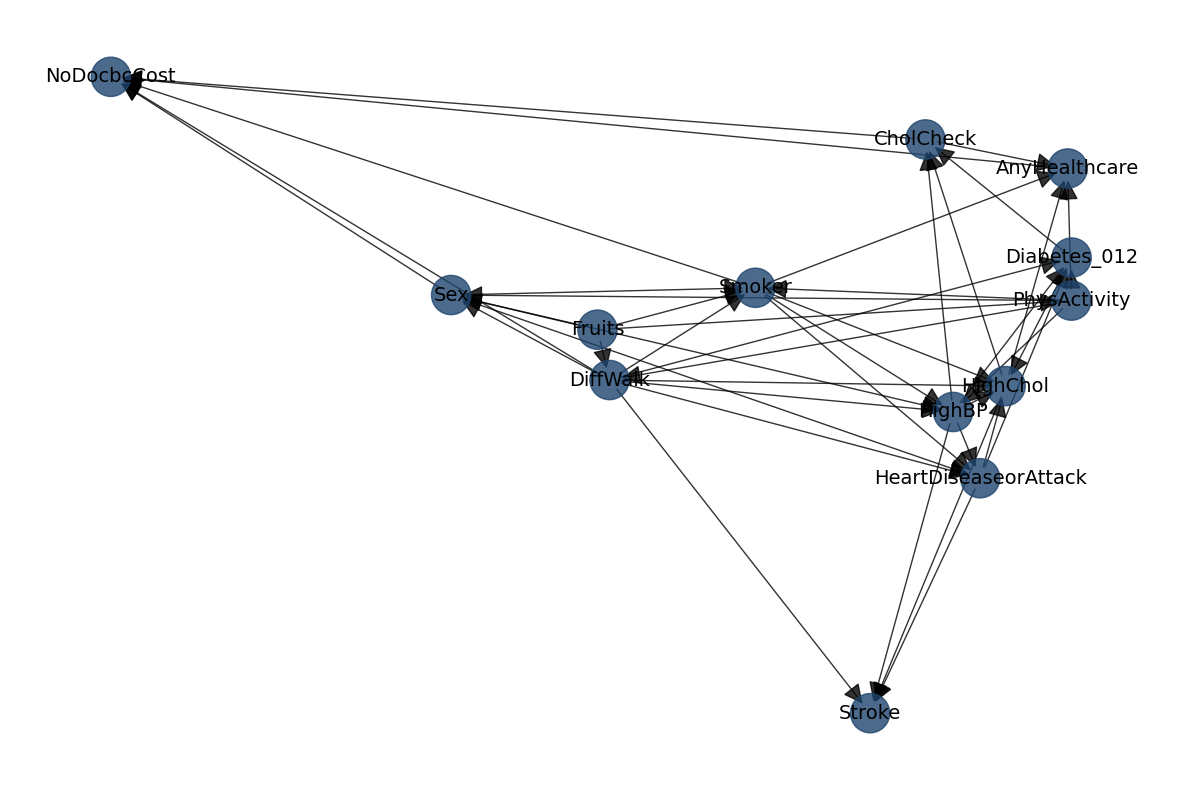

In [ ]:
model_nuevo = bn.structure_learning.fit(nueva_base_de_datos)
plot = bn.plot(model_nuevo)

* Se caracterizan los parámetros de esta segunda red.

In [ ]:
model_nuevo = bn.parameter_learning.fit(model_nuevo,nueva_base_de_datos,methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of HighBP:
+--------------+--------------------+-----+---------------------+
| DiffWalk     | DiffWalk(0.0)      | ... | DiffWalk(1.0)       |
+--------------+--------------------+-----+---------------------+
| PhysActivity | PhysActivity(0.0)  | ... | PhysActivity(1.0)   |
+--------------+--------------------+-----+---------------------+
| Sex          | Sex(0.0)           | ... | Sex(1.0)            |
+--------------+--------------------+-----+---------------------+
| Smoker       | Smoker(0.0)        | ... | Smoker(1.0)         |
+--------------+--------------------+-----+---------------------+
| HighBP(0.0)  | 0.5586407766990291 | ... | 0.31198528123357283 |
+--------------+--------------------+-----+---------------------+
| HighBP(1.0)  | 0.4413592233009709 | ... | 0.6880147187664272  |
+--------------+--------------------+-----+---------------------

* Se realizan 2 consultas de inferencia sobre la primera red bayesiana.

In [ ]:
query = bn.inference.fit(model, variables=['Diabetes_012'], evidence={'HighBP':1, 'PhysActivity':1})
print(query)

[bnlearn] >Variable Elimination..
+----+----------------+-----------+
|    |   Diabetes_012 |         p |
+====+================+===========+
|  0 |              0 | 0.756272  |
+----+----------------+-----------+
|  1 |              1 | 0.0279544 |
+----+----------------+-----------+
|  2 |              2 | 0.215773  |
+----+----------------+-----------+
+-------------------+---------------------+
| Diabetes_012      |   phi(Diabetes_012) |
+===================+=====================+
| Diabetes_012(0.0) |              0.7563 |
+-------------------+---------------------+
| Diabetes_012(1.0) |              0.0280 |
+-------------------+---------------------+
| Diabetes_012(2.0) |              0.2158 |
+-------------------+---------------------+


In [ ]:
query = bn.inference.fit(model, variables=['Sex'], evidence={'Diabetes_012':1})
print(query)

[bnlearn] >Variable Elimination..
+----+-------+----------+
|    |   Sex |        p |
+====+=======+==========+
|  0 |     0 | 0.560844 |
+----+-------+----------+
|  1 |     1 | 0.439156 |
+----+-------+----------+
+----------+------------+
| Sex      |   phi(Sex) |
+==========+============+
| Sex(0.0) |     0.5608 |
+----------+------------+
| Sex(1.0) |     0.4392 |
+----------+------------+


* Se realizan las mismas dos consultas sobre la segunda red bayesiana.

In [ ]:
query = bn.inference.fit(model_nuevo, variables=['Diabetes_012'], evidence={'HighBP':1, 'PhysActivity':1})
print(query)

[bnlearn] >Variable Elimination..
+----+----------------+-----------+
|    |   Diabetes_012 |         p |
+====+================+===========+
|  0 |              0 | 0.755631  |
+----+----------------+-----------+
|  1 |              1 | 0.0280174 |
+----+----------------+-----------+
|  2 |              2 | 0.216352  |
+----+----------------+-----------+
+-------------------+---------------------+
| Diabetes_012      |   phi(Diabetes_012) |
+===================+=====================+
| Diabetes_012(0.0) |              0.7556 |
+-------------------+---------------------+
| Diabetes_012(1.0) |              0.0280 |
+-------------------+---------------------+
| Diabetes_012(2.0) |              0.2164 |
+-------------------+---------------------+


In [ ]:
query = bn.inference.fit(model_nuevo, variables=['Sex'], evidence={'Diabetes_012':1})
print(query)

[bnlearn] >Variable Elimination..
+----+-------+----------+
|    |   Sex |        p |
+====+=======+==========+
|  0 |     0 | 0.550792 |
+----+-------+----------+
|  1 |     1 | 0.449208 |
+----+-------+----------+
+----------+------------+
| Sex      |   phi(Sex) |
+==========+============+
| Sex(0.0) |     0.5508 |
+----------+------------+
| Sex(1.0) |     0.4492 |
+----------+------------+


Las probabilidades obtenidas en ambos casos no mostraron diferencias significativas entre sí, lo que sugiere que las variables HighBP y PhysActivity tienen una influencia fuerte y estable en la probabilidad de desarrollar diabetes. Además, la relación entre Sex y Diabetes_012 parece sólida, ya que al seleccionar aleatoriamente la mitad de los datos, aproximadamente la mitad correspondió a hombres y la otra mitad a mujeres. Sin embargo, es importante destacar que en futuras pruebas, la elección aleatoria de datos podría dar como resultado conjuntos de datos desequilibrados en términos de género, lo que podría llevar a cambios drásticos en las probabilidades.